### Importing required packages 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

## Linear regression function

For Ax = b, using **$A^TAx = A^Tb$**



In [10]:
def mylinear_reg(fr):
    frcopy = fr.copy()
    
    # number of data-points
    nrows = fr['x'].count()
    # column matrix of 1s for intercept
    D = [1 for i in range(nrows)]
    B = frcopy['y']  
    
    A_transpose = np.matrix([frcopy['x'], D], dtype = float)   
    A = A_transpose.transpose()
    
    A_trans_mult_A = np.matmul(A_transpose, A)
    A_trans_B = np.transpose(np.matmul(A_transpose, B))
    
    A_trans_A_inv = np.linalg.inv(A_trans_mult_A)
    
    # x_hat will be equal to x=(ATA)^-1.ATb
 
    x_hat = np.matmul(A_trans_A_inv, A_trans_B)
    
    intercept = x_hat.item(1)
    slope = x_hat.item(0)
    
    y_hat = intercept + slope*frcopy['x']
    error = y_hat - B
    sq_error = np.square(error)
    sum_sq_error = pd.Series.sum(sq_error)
    
    print "Slope of best fit line is ", round(slope, 3)
    print "Intercept of best fit line is ", round(intercept, 3)
    print "Sum of squares of distances from observed y-values on y-values on the line is", round(sum_sq_error, 3)
    
    # Plotting scatter plot
    plt.scatter(fr['x'], B)
    # plotting line over scatter using my linear regression algorithm
    plt.plot(fr['x'], y_hat, color = 'green')
    plt.title("x vs. y to check linear relationship")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

### Testing regression function for given text files

#### *(a)* Life Expectancy (y) as a function of Televisions per Thousand People (x) (TVlife.txt)

Slope of best fit line is  0.032
Intercept of best fit line is  57.337
Sum of squares of distances from observed y-values on y-values on the line is 1417.892


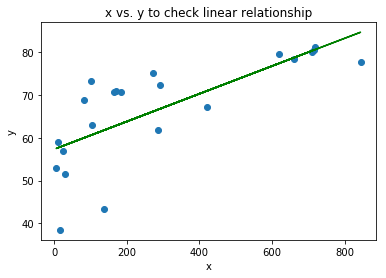

In [11]:
tvlife = pd.read_csv('/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw3/TVlife.txt')
mylinear_reg(tvlife)

As it can be observed, the linear assumption for life expectancy vs. television is resonable. 
But we only have a few data points and least squared error is still high.

Now let's compare results with **statmodels.ols** to see how my function performed. 

In [22]:
result1 = sm.ols(formula="y ~ x", data = tvlife).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     24.68
Date:                Sun, 30 Jul 2017   Prob (F-statistic):           7.39e-05
Time:                        13:35:31   Log-Likelihood:                -77.041
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      20   BIC:                             160.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.3369      2.649     21.644      0.0

As we can see above, the intercept and slopes are matching with one generated by statsmodels.ols. Hence, we can say that our model/ functio gives right answer.

#### *(b)* National Population (y) as a function of Year (x) (population.txt)

Slope of best fit line is  2002587.091
Intercept of best fit line is  -3740767381.46
Sum of squares of distances from observed y-values on y-values on the line is 5.28256039926e+15


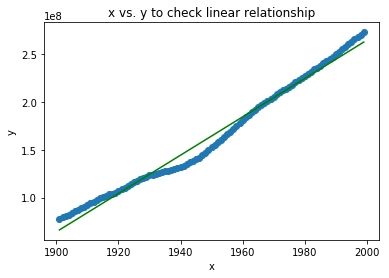

In [13]:
population = pd.read_csv('/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw3/population.txt')
mylinear_reg(population)

Here also, linear assumption is reasonable.
Now let's compare results with **statmodels.ols** to see how my function performed. 

In [20]:
result2 = sm.ols(formula="y ~ x", data = population).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5954.
Date:                Sun, 30 Jul 2017   Prob (F-statistic):           7.11e-89
Time:                        13:31:54   Log-Likelihood:                -1705.1
No. Observations:                  99   AIC:                             3414.
Df Residuals:                      97   BIC:                             3419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.741e+09   5.06e+07    -73.907      0.0

As we can see above, the intercept and slopes are matching with one generated by statsmodels.ols. Hence, we can say that our model/ functio gives right answer.

#### *(c)* Team Winning Percentage (WinPct) (y) as a function of PM (x) 
(the average point difference over all that team’s games) (nba.txt)

Slope of best fit line is  0.032
Intercept of best fit line is  0.5
Sum of squares of distances from observed y-values on y-values on the line is 0.046


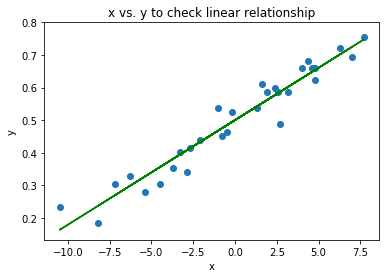

In [14]:
nba = pd.read_csv('/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw3/nba.txt')
mylinear_reg(nba)

Lease squared error is very small in this case and linear assumption seems quite reasonable. 

Now let's compare results with **statmodels.ols** to see how my function performed. 

In [21]:
result3 = sm.ols(formula="y ~ x", data = nba).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     408.2
Date:                Sun, 30 Jul 2017   Prob (F-statistic):           3.11e-18
Time:                        13:33:37   Log-Likelihood:                 54.567
No. Observations:                  30   AIC:                            -105.1
Df Residuals:                      28   BIC:                            -102.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5000      0.007     67.414      0.0

As we can see above, the intercept and slopes are matching with one generated by statsmodels.ols. Hence, we can say that our model/ functio gives right answer.

### Testing code for some new dataset

This is a real dataset which I downloaded from NSE (National Stock Exchange) website 2 months ago when I was trying 
to analyze relationship between 2 stocks which move together. The 2 stocks are - ***1. Power Finance Corporation (PFC), 2. Rural Electrification Finance. (REC)***. Both of these companies are listed in NSE and I was trying to see if these 2 stocks move together or not. IF yes, which one of them is undervalued and worth investing in.  
The data has been already normalized to keep it between -1 to 1. PFC stock data is in 'x' and REC stock data in in 'y'.
.CSV file is attached with submission. 





Slope of best fit line is  0.566
Intercept of best fit line is  0.2
Sum of squares of distances from observed y-values on y-values on the line is 12.688


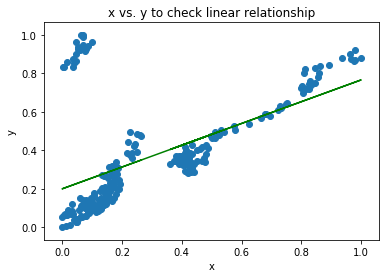

In [16]:
stock = pd.read_csv('/Users/groverprince/Documents/msan/labs/msan502_david_algebra/hw3/Stock_comparison.csv')
stock = stock.rename(columns={'Unnamed: 1': 'x', 'Unnamed: 2': 'y'})
mylinear_reg(stock)

Although there are some outliers, but those are mostly due to *Dividents, Bonus Shares or Stock splits* (which cause sudden price movements)

After doing more further analysis *(which I am not showing)*, I realized that PFC is undervalued stock and I have invested in it. 